# Probabilidade

## Importações

In [1]:
import numpy as np
import seaborn as sns
import math
from scipy import stats

## Permutações

##### Quantas possíveis combinações pode se ter em uma senha de 5 caracteres com todas as letras do alfabeto(26) e os números de 0 a 9(10), sem repetição de um caractere

#### Quando os valores não pode repetir, utilizamos o fatorial

In [2]:
math.factorial(3)

6

In [3]:
math.factorial(36) / math.factorial(36-5)

45239040.0

#### Quando os valores pode repetir, utilizamos a exponenciação

In [4]:
math.pow(36, 5)

60466176.0

#### Combinação

#### Quantas duplas de combinações é possível fazer com as letras ABCDEF, sem repetição

In [5]:
math.factorial(6) / (math.factorial(2) * math.factorial(6-2))

15.0

#### Considerando repetições

In [6]:
math.factorial((6+2) -1) / (math.factorial(2) * math.factorial(6-1))

21.0

## Interseção, união e diferença

In [7]:
a = (0,1,2,3,4,5,6,7)
b = (0,2,4,6,8)

#### Interseção

In [8]:
set(a) & set(b)

{0, 2, 4, 6}

#### União

In [9]:
set(a) | set(b)

{0, 1, 2, 3, 4, 5, 6, 7, 8}

#### Diferença

In [10]:
set(a) - set(b)

{1, 3, 5, 7}

In [11]:
set(a).difference(set(b))

{1, 3, 5, 7}

In [12]:
set(b) - set(a)

{8}

## Probabilidade e distribuição normal

In [14]:
dados = np.array([126.,129.5,133.,133.,136.5,136.5,140.,140.,140.,140.,143.5,
                 143.5,143.5,143.5,143.5,143.5,147.,147.,147.,147.,147.,147.,147.,
                 150.5,150.5,150.5,150.5,150.5,150.5,150.5,150.5,154.,154.,154.,
                 154.,154.,154.,154.,154.,154.,157.5,157.5,157.5,157.5,157.5,
                 157.5,157.5,157.5,157.5,157.5,161.,161.,161.,161.,161.,161.,
                 161.,161.,161.,161.,164.5,164.5,164.5,164.5,164.5,164.5,164.5,
                 164.5,164.5,168.,168.,168.,168.,168.,168.,168.,168.,171.5,
                 171.5,171.5,171.5,171.5,171.5,175.,175.,175.,175.,175.,175.,
                 178.5,178.5,178.5,178.5,178.5,182.,182.,185.5,185.5,189.,192.5])

<AxesSubplot:ylabel='Count'>

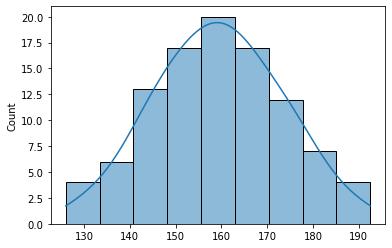

In [15]:
sns.histplot(dados, kde=True)

In [16]:
media = np.mean(dados)
desvio_padrao = np.std(dados)
media, desvio_padrao

(159.32, 13.730353236534011)

In [17]:
np.quantile(dados, [0.25, .5, 0.75])

array([150.5 , 159.25, 168.  ])

#### Calcular a probabilidade de selecionar uma pessoa em Q1

In [18]:
(150.5 - media) / desvio_padrao

-0.6423724028112804

In [19]:
0.26109 * 100

26.108999999999998

#### Calcular a probabilidade de selecionar uma pessoa em Q3

In [20]:
(168 - media) / desvio_padrao

0.6321760154650706

In [21]:
0.73891

0.73891

In [22]:
1 - 0.73891

0.26109000000000004

#### Calcular a probabilidade de selecionar uma pessoa entre o Q2 e Q3

In [23]:
(168 - media) / desvio_padrao

0.6321760154650706

In [25]:
0.73891 - 0.5

0.23890999999999996

#### Calcular a probabilidade de selecionar uma pessoa em Q1 ou Q3

In [28]:
0.26109 * 2

0.52218

#### Calcular a probabilidade de não selecionar uma pessoa em Q1 ou Q3

In [29]:
1 - 0.52218

0.47782

#### Scipy

#### Calcular a probabilidade de selecionar uma pessoa em Q1

In [31]:
stats.norm.cdf(150.5, media, desvio_padrao)

0.26031570694492456

#### Calcular a probabilidade de selecionar uma pessoa em Q3

In [33]:
1 - stats.norm.cdf(168, media, desvio_padrao)

0.2636359339683334

In [34]:
stats.norm.sf(168, media, desvio_padrao)

0.2636359339683334

#### Calcular a probabilidade de selecionar uma pessoa entre o Q2 e Q3

In [35]:
stats.norm.cdf(168, media, desvio_padrao)

0.7363640660316666

In [36]:
stats.norm.cdf(159.25, media, desvio_padrao)

0.49796612380073607

In [37]:
stats.norm.cdf(168, media, desvio_padrao) - stats.norm.cdf(159.25, media, desvio_padrao)

0.23839794223093053

Exercício 1 

Uma empresa fez um concurso para seleção de novo funcionários. A prova tinha 50 questões e o Pedro acertou 40 questões.Considerando uma distribuição normal com média 24 e desvio padrão de 8, quais são as chances dele ser contratado?

In [41]:
media = 24
desvio_padrao = 8
stats.norm.cdf(40, media, desvio_padrao) * 100

97.72498680518208

Exercício 2
A vida útil de uma marca de pneus é representada por um distribuição normal com média de 38.000km e desvio padrão de 3.000km

<ul>Qual a probabilidade de que um pneu escolhido aleatoriamente tenha vida útil de 35.000km?</ul>
<ul>Qual a probabilidade de que ele dure mais do que 44.000km?</ul>

In [51]:
media = 38000
desvio_padrao = 3000
(1 - stats.norm.cdf(35000, media, desvio_padrao)) * 100

84.1344746068543

In [50]:
(1 - stats.norm.cdf(44000, media, desvio_padrao)) * 100

2.275013194817921

### Probabilidade - Distribuição Binomial

#### Exemplo das moedas

Jogando a moeda 10 vezes, qual a probabilidade de boter 5 "caras"?

In [52]:
n = 10
x = 5
p = 0.5

In [54]:
((math.factorial(n)) / (math.factorial(n - x) * math.factorial(x))) * (math.pow(p, x) * math.pow(1 - p, n-x))

0.24609375

In [55]:
stats.binom.pmf(x, n, p)

0.24609375000000003

#### Exercicio 1

70% das pessoas que compraram o livro de Python são mulheres. Se 10 leitores forem selecionados randomicamente, qual a probablidade de selecionarmos 7 mulheres?

In [56]:
p = 0.7
x = 7
n = 10

In [58]:
stats.binom.pmf(x, n, p) * 100

26.682793200000006

#### Exercicio 2

Em uma linha de produção de uma fábrica de parafusos, a probabilidade de obter um parafuso defeituoso é 0,05. Tendo uma amostra de 50 peças, qual a probabilidade de obter

1. Um parafuso defeituoso
2. Nenhum parafuso defeituoso

In [65]:
p = 0.05
n = 50
x = 1

In [66]:
stats.binom.pmf(x, n, p) * 100

20.24867770439825

In [68]:
p = 0.05
n = 50
x = 0

In [69]:
stats.binom.pmf(x, n, p) * 100

7.694497527671315

#### Probabilidade - Distribuição  de Poisson

Exemplo dos carros

O número médio de carros vendidos por dia é 10. Qual a probabilidade de vender 14 carros amanhã?

In [70]:
math.e

2.718281828459045

In [71]:
x = 14
media = 10

In [73]:
math.pow(math.e, -media) * (math.pow(media, x) / math.factorial(x)) * 100

5.207710444602621

In [74]:
stats.poisson.pmf(x, media)

0.05207710444602615

#### Exercicio 1

Em uma linha de produção de uma fábrica de parafusos, a probabilidade é de obter 0.05 defeitos por UNIDADE. Qual a probabilidade de uma unidade apresentar:

1. Um defeito
2. Nenhum defeito

In [79]:
x = 1
media = 0.05

stats.poisson.pmf(x, media) * 100

4.756147122503571

In [80]:
x = 0
media = 0.05

stats.poisson.pmf(x, media) * 100

95.1229424500714

#### Exercicio 2

Um vendedor de uma loja vende em média 50 produtos por dia. Qual a probabilidade de vender somente 5 produtos no próximo dia?

In [82]:
media = 50
x = 5

In [83]:
stats.poisson.pmf(x, media)

5.0227860624060495e-14